In [ ]:
# Web Scraper 
### @Author : Woojin Park, Nidhi Bhaskar
### @Copyright : 2020, Neolth NSF grant NLP project 
### @Email : woojinpa@andrew.cmu.edu , nidhibha@andrew.cmu.edu
### @Status : Production

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import requests
import json
import re
import time

In [2]:
##Build a Time Conversion function  :From Utc

In [3]:
def dateConvert(year,month,day) :
    day = dt.date(year,month,day)
    return int(day.strftime("%s"))

In [4]:
dateConvert(2017,5,22)

1495425600

In [5]:
dateConvert(2020,5,22)

1590120000

In [6]:
print(dt.datetime.fromtimestamp(1495425600))
print(dt.datetime.fromtimestamp(1590120000))

2017-05-22 00:00:00
2020-05-22 00:00:00


In [7]:
## Put the URL of Pushshift api
pushshift_reddit = "http://api.pushshift.io/reddit"

In [8]:
def fetchObjects(**kwargs):
    # Default paramaters for API query : will be used to requests.get(), for GET-style URL parameters
    params = {
        "sort_type":"created_utc",
        "sort":"asc",
        "size":1000, ##maximum size api can return
        "before" : dateConvert(2020,5,22) 
        }

    # Add additional paramters based on function arguments
    for key,value in kwargs.items():
        params[key] = value

    # Print API query paramaters
    print(params)

    # Set the type variable based on function input
    # The type can be "comment" or "submission", default is "comment"
    type = "comment"
    
    if 'type' in kwargs and kwargs['type'].lower() == "submission":
        type = "submission"
    
    # Perform an API request
    r = requests.get(pushshift_reddit + "/" + type + "/search/", params=params, timeout=30)

    # Check the status code successful or not
    if r.status_code == 200: #  200 means : http server response successfully 
        response = json.loads(r.text)
        data = response['data']
        sorted_data_by_id = sorted(data, key=lambda x: int(x['id'],36))
        
        return sorted_data_by_id

In [9]:
def extract_reddit_data(**kwargs):
    # Speficify the start timestamp
    max_created_utc = dateConvert(2017,5,22) 
    max_id = 0
    print("Scrap subreddit data from", dt.datetime.fromtimestamp(dateConvert(2017,5,22))," to ", \
                              dt.datetime.fromtimestamp(dateConvert(2020,5,22))) 
    # Open a file for JSON output
    file = open("submissions_happy.json","a")

    # While loop for recursive function
    while 1:
        nothing_processed = True
        # Call the recursive function
        objects = fetchObjects(**kwargs, after=max_created_utc)
        
        # Loop the returned data, ordered by date
        for object in objects:
            id = int(object['id'],36)
            if id > max_id:
                nothing_processed = False
                created_utc = object['created_utc']
                max_id = id
                if created_utc > max_created_utc: max_created_utc = created_utc
                # Output JSON data to the opened file
                print(json.dumps(object,sort_keys=True, ensure_ascii=True),file=file)
        
        # Exit if nothing happened
        if nothing_processed: return
        max_created_utc -= 1

        # Sleep a little before the next recursive function call
        time.sleep(.5)
    
# Start program by calling function with:
# 1) Subreddit specified
# 2) The type of data required (comment or submission)
extract_reddit_data(subreddit="happy", type="submission")

Scrap subreddit data from 2017-05-22 00:00:00  to  2020-05-22 00:00:00
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'happy', 'type': 'submission', 'after': 1495425600}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'happy', 'type': 'submission', 'after': 1499826522}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'happy', 'type': 'submission', 'after': 1503535007}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'happy', 'type': 'submission', 'after': 1506310131}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'happy', 'type': 'submission', 'after': 1509330213}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, 'before': 1590120000, 'subreddit': 'happy', 'type': 'submission', 'after': 1512138705}
{'sort_type': 'created_utc', 'sort': 'asc', 'size': 1000, '

In [10]:
with open('submissions_happy.json') as f:
    data = json.loads("[" +f.read().replace("}\n{", "},\n{") + "]")

In [11]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [12]:
data =pd.DataFrame(data)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41421 entries, 0 to 41420
Columns: 102 entries, author to upvote_ratio
dtypes: bool(7), float64(19), int64(4), object(72)
memory usage: 30.3+ MB
None


In [13]:
data.head(2)

author  author_created_utc author_flair_css_class  \
0  francienolan32        1.492583e+09                   None   
1  alisindianhair        1.491035e+09                   None   

  author_flair_text author_fullname brand_safe  contest_mode  created_utc  \
0              None       t2_177dlr       True         False   1495429590   
1              None       t2_16ocl7       True         False   1495433737   

       domain                                          full_link  gilded  \
0  self.happy  https://www.reddit.com/r/happy/comments/6claus...     0.0   
1  self.happy  https://www.reddit.com/r/happy/comments/6clkfb...     0.0   

       id  is_self  is_video link_flair_css_class  \
0  6claus     True     False                        
1  6clkfb     True     False                  NaN   

                link_flair_text  locked media_embed  num_comments  over_18  \
0  Removed: silver lining story   False          {}             0    False   
1                           NaN   False          {}             0    False   

                                           permalink  retrieved_on  score  \
0           /r/happy/comments/6claus/i_have_a_crush/    1497166178      1   
1  /r/happy/comments/6clkfb/ombre_hair_brazilian_...    1497166309      0   

  secure_media_embed   selftext  spoiler  stickied subreddit subreddit_id  \
0                 {}  [removed]    False     False     happy     t5_2qh5i   
1                 {}  [removed]    False     False     happy     t5_2qh5i   

   suggested_sort thumbnail                               title  \
0             NaN   default                      I have a crush   
1             NaN   default  ombre hair brazilian hair straight   

                                                 url post_hint preview  \
0  https://www.reddit.com/r/happy/comments/6claus...       NaN     NaN   
1  https://www.reddit.com/r/happy/comments/6clkfb...       NaN     NaN   

   thumbnail_height  thumbnail_width media secure_media  edited  \
0               NaN              NaN   NaN          NaN     NaN   
1               NaN              NaN   NaN          NaN     NaN   

   approved_at_utc  banned_at_utc can_mod_post banned_by author_cakeday  \
0              NaN            NaN          NaN       NaN            NaN   
1              NaN            NaN          NaN       NaN            NaN   

   view_count parent_whitelist_status whitelist_status is_crosspostable  \
0         NaN                     NaN              NaN              NaN   
1         NaN                     NaN              NaN              NaN   

   num_crossposts pinned is_reddit_media_domain distinguished  \
0             NaN    NaN                    NaN           NaN   
1             NaN    NaN                    NaN           NaN   

  crosspost_parent crosspost_parent_list subreddit_type author_flair_richtext  \
0              NaN                   NaN            NaN                   NaN   
1              NaN                   NaN            NaN                   NaN   

  author_flair_type link_flair_richtext link_flair_text_color link_flair_type  \
0               NaN                 NaN                   NaN             NaN   
1               NaN                 NaN                   NaN             NaN   

  rte_mode author_flair_background_color author_flair_text_color  \
0      NaN                           NaN                     NaN   
1      NaN                           NaN                     NaN   

  link_flair_background_color link_flair_template_id send_replies no_follow  \
0                         NaN                    NaN          NaN       NaN   
1                         NaN                    NaN          NaN       NaN   

   subreddit_subscribers is_original_content previous_visits  wls  pwls  \
0                    NaN                 NaN             NaN  NaN   NaN   
1                    NaN                 NaN             NaN  NaN   NaN   

  archived author_flair_template_id can_gild  category  content_ca

In [14]:
reddit_data = data[['author','over_18','title','selftext','num_comments', 'score', 'full_link','created_utc']]

In [15]:
reddit_data.isnull().sum()

author            0
over_18           0
title             0
selftext        480
num_comments      0
score             0
full_link         0
created_utc       0
dtype: int64

In [16]:
reddit_data = reddit_data.dropna()
reddit_data.isnull().sum()

author          0
over_18         0
title           0
selftext        0
num_comments    0
score           0
full_link       0
created_utc     0
dtype: int64

In [17]:
reddit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40941 entries, 0 to 41420
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        40941 non-null  object
 1   over_18       40941 non-null  bool  
 2   title         40941 non-null  object
 3   selftext      40941 non-null  object
 4   num_comments  40941 non-null  int64 
 5   score         40941 non-null  int64 
 6   full_link     40941 non-null  object
 7   created_utc   40941 non-null  int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 2.5+ MB


In [18]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

_timestamp = reddit_data["created_utc"].apply(get_date)
reddit_data = reddit_data.assign(timestamp = _timestamp)

In [19]:
reddit_data.head(5)

author  over_18  \
0     francienolan32    False   
1     alisindianhair    False   
2          trex88007    False   
3  Stalked_Like_Corn    False   
4          [deleted]    False   

                                               title  \
0                                     I have a crush   
1                 ombre hair brazilian hair straight   
2                               Interview in an hour   
3                  Skater proposes to his girlfriend   
4  The difference between a "posed" smile and a g...   

                                            selftext  num_comments  score  \
0                                          [removed]             0      1   
1                                          [removed]             0      0   
2  Oh reddit,\nI need this! 11.5 months unemploye...             4      5   
3                                                               46   2184   
4                                          [deleted]             0      1   

                                           full_link  created_utc  \
0  https://www.reddit.com/r/happy/comments/6claus...   1495429590   
1  https://www.reddit.com/r/happy/comments/6clkfb...   1495433737   
2  https://www.reddit.com/r/happy/comments/6cmrwk...   1495453931   
3  https://www.reddit.com/r/happy/comments/6cnh9c...   1495462430   
4  https://www.reddit.com/r/happy/comments/6cnlrk...   1495463731   

            timestamp  
0 2017-05-22 01:06:30  
1 2017-05-22 02:15:37  
2 2017-05-22 07:52:11  
3 2017-05-22 10:13:50  
4 2017-05-22 10:35:31

In [20]:
reddit_data.describe(include ='all').transpose()

count unique                                                top  \
author        40941  25521                                          [deleted]   
over_18       40941      2                                              False   
title         40941  39950                                              Happy   
selftext      40941   6911                                                      
num_comments  40941    NaN                                                NaN   
score         40941    NaN                                                NaN   
full_link     40941  40941  https://www.reddit.com/r/happy/comments/6p8n12...   
created_utc   40941    NaN                                                NaN   
timestamp     40941  40934                                2017-11-26 03:01:29   

               freq               first                last         mean  \
author         2300                 NaT                 NaT          NaN   
over_18       40885                 NaT                 NaT          NaN   
title            30                 NaT                 NaT          NaN   
selftext      27981                 NaT                 NaT          NaN   
num_comments    NaN                 NaT                 NaT      10.7898   
score           NaN                 NaT                 NaT      235.569   
full_link         1                 NaT                 NaT          NaN   
created_utc     NaN                 NaT                 NaT  1.54508e+09   
timestamp         2 2017-05-22 01:06:30 2020-05-21 23:59:19          NaN   

                      std          min          25%          50%          75%  \
author                NaN          NaN          NaN          NaN          NaN   
over_18               NaN          NaN          NaN          NaN          NaN   
title                 NaN          NaN          NaN          NaN          NaN   
selftext              NaN          NaN          NaN          NaN          NaN   
num_comments      58.8499            0            1            2            4   
score             1862.88            0            1            1           20   
full_link             NaN          NaN          NaN          NaN          NaN   
created_utc   2.52393e+07  1.49543e+09  1.52489e+09  1.54562e+09  1.56525e+09   
timestamp             NaN          NaN          NaN          NaN          NaN   

                      max  
author                NaN  
over_18               NaN  
title                 NaN  
selftext              NaN  
num_comments         2298  
score               82407  
full_link             NaN  
created_utc   1.59012e+09  
timestamp             NaN

In [21]:
reddit_data['over_18'] = reddit_data['over_18'].astype('str')

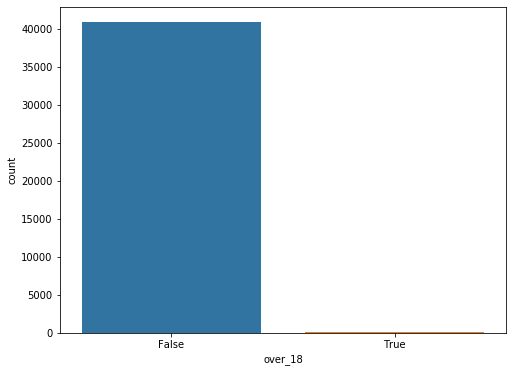

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(x='over_18', data =reddit_data)

In [23]:
count_df = reddit_data.groupby(by=['score']).count().reset_index()
count_df= count_df.rename(columns={'author': 'number of users'})
count_df =count_df.iloc[:,[0,1]]
count_df.transpose()

0      1     2     3     4     5     6     7     8     9     \
score               0      1     2     3     4     5     6     7     8     9   
number of users   545  21468  1149   782   538   555   522   516   442   456   

                 10    11    12    13    14    15    16    17    18    19    \
score              10    11    12    13    14    15    16    17    18    19   
number of users   447   374   358   378   352   396   338   285   303   294   

                 20    21    22    23    24    25    26    27    28    29    \
score              20    21    22    23    24    25    26    27    28    29   
number of users   288   237   262   221   242   227   209   184   208   183   

                 30    31    32    33    34    35    36    37    38    39    \
score              30    31    32    33    34    35    36    37    38    39   
number of users   176   177   160   112   147   150   135   117   136   106   

                 40    41    42    43    44    45    46    47    48    49    \
score              40    41    42    43    44    45    46    47    48    49   
number of users   125   107   121    86    98   106   108   102    79   100   

                 50    51    52    53    54    55    56    57    58    59    \
score              50    51    52    53    54    55    56    57    58    59   
number of users    86    80    77    75    76    75    62    75    67    44   

                 60    61    62    63    64    65    66    67    68    69    \
score              60    61    62    63    64    65    66    67    68    69   
number of users    50    78    57    55    57    44    44    55    52    52   

                 70    71    72    73    74    75    76    77    78    79    \
score              70    71    72    73    74    75    76    77    78    79   
number of users    44    35    46    44    47    33    40    38    41    40   

                 80    81    82    83    84    85    86    87    88    89    \
score              80    81    82    83    84    85    86    87    88    89   
number of users    27    33    35    31    26    33    32    35    32    21   

                 90    91    92    93    94    95    96    97    98    99    \
score              90    91    92    93    94    95    96    97    98    99   
number of users    20    22    33    25    25    32    24    25    15    30   

                 100   101   102   103   104   105   106   107   108   109   \
score             100   101   102   103   104   105   106   107   108   109   
number of users    25    23    25    17    24    20    14    29    18    27   

                 110   111   112   113   114   115   116   117   118   119   \
score             110   111   112   113   114   115   116   117   118   119   
number of users    21    20    15    15    19    17    19    10     9    13   

                 120   121   122   123   124   125   126   127   128   129   \
score             120   121   122   123   124   125   126   127   128   129   
number of users    17    10    15    13    15    10    16    14    17    13   

                 130   131   132   133   134   135   136   137   138   139   \
score             130   131   132   133   134   135   136   137   138   139   
number of users     9    13    13    13    11     8    11    15    14     6   

                 140   141   142   143   144   145   146   147   148   149   \
score             140   141   142   143   144   145   146   147   148   149   
number of users    10     8    10     9    10    10    11     8     9     4   

                 150   151   152   153   154   155   156   157   158   159   \
score             150   151   152   153   154   155   156   157   158   159   
number of users    10     8     7    10    11     8     8     4     7    12   

                 160   161   162   163   164   165   166   167   168   169   \
score             160   161   162   163   164   165   166   167   168   169   
number of users    15     7    11     8     6   

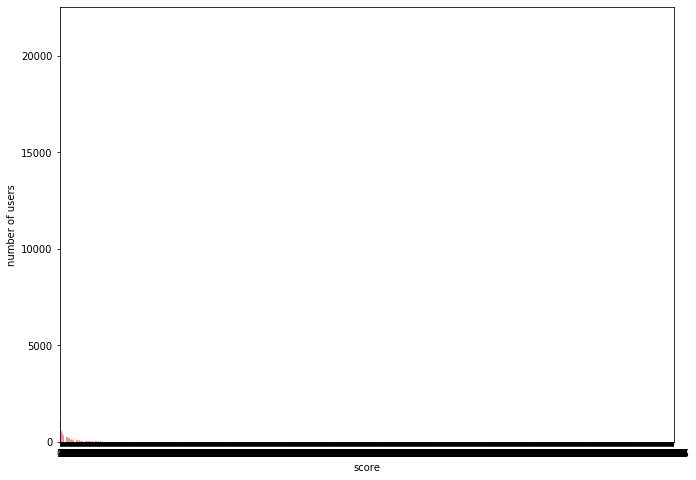

In [24]:
plt.figure(figsize=(11,8))
sns.barplot(x= 'score', y= 'number of users', data =count_df)

In [25]:
count_df = reddit_data.groupby(by=['num_comments']).count().reset_index()
count_df= count_df.rename(columns={'author': 'number of users'})
count_df =count_df.iloc[:,[0,1]]
count_df.transpose()

0      1     2     3     4     5     6    7    8    9  \
num_comments        0      1     2     3     4     5     6    7    8    9   
number of users  8863  10036  7174  2752  2277  1487  1246  836  707  539   

                  10   11   12   13   14   15   16   17   18   19  20  21  22  \
num_comments      10   11   12   13   14   15   16   17   18   19  20  21  22   
number of users  424  346  292  245  207  175  171  132  140  108  96  95  89   

                 23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  \
num_comments     23  24  25  26  27  28  29  30  31  32  33  34  35  36  37   
number of users  82  57  62  59  55  46  41  52  45  35  32  39  24  22  30   

                 38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  \
num_comments     38  39  40  41  42  43  44  45  46  47  48  49  50  51  52   
number of users  41  26  34  26  19  22  24  22  22  26  18  19  18  18  10   

                 53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  \
num_comments     53  54  55  56  57  58  59  60  61  62  63  64  65  66  67   
number of users  20  17  14  19  12  17  14  21  14  19  18  16   9  22  11   

                 68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  \
num_comments     68  69  70  71  72  73  74  75  76  77  78  79  80  81  82   
number of users  19  16  13  15  10  16  16  11   9   8  11  16  10   7  10   

                 83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  \
num_comments     83  84  85  86  87  88  89  90  91  92  93  94  95  96  97   
number of users  10   7   5  12   5   7   8   6  11   5  15   7  10  14  11   

                 98  99  100  101  102  103  104  105  106  107  108  109  \
num_comments     98  99  100  101  102  103  104  105  106  107  108  109   
number of users   5   8    9    9   16    7   12    8   11    6    7    3   

                 110  111  112  113  114  115  116  117  118  119  120  121  \
num_comments     110  111  112  113  114  115  116  117  118  119  120  121   
number of users    8    6   14    6    4    6    1    4    9    7    5    3   

                 122  123  124  125  126  127  128  129  130  131  132  133  \
num_comments     122  123  124  125  126  127  128  129  130  131  132  133   
number of users   10    4    4    9    7    8    7    9    3    8    2    3   

                 134  135  136  137  138  139  140  141  142  143  144  145  \
num_comments     134  135  136  137  138  139  140  141  142  143  144  145   
number of users   11   11   10    9    5    7    2    5    3   11    5    4   

                 146  147  148  149  150  151  152  153  154  155  156  157  \
num_comments     146  147  148  149  150  151  152  153  154  155  156  157   
number of users    5    4    6    6    3    7    5    3    2    2    4    6   

                 158  159  160  161  162  163  164  165  166  167  168  169  \
num_comments     158  159  160  161  162  163  164  165  166  167  168  169   
number of users    1    2    1    4    6    6    1    2    5    3    2    5   

                 170  171  172  173  174  175  176  177  178  179  180  181  \
num_comments     170  171  172  174  175  176  177  178  179  180  181  182   
number of users    1    4    8    5    9    4    2    1    6    5    1    4   

                 182  183  184  185  186  187  188  189  190  191  192  193  \
num_comments     183  184  185  186  187  188  189  190  191  192  193  194   
number of users    3    2    4    3    3    2    2    5    3    2    3    2   

                 194  195  196  197  198  199  200  201  202  203  204  205  \
num_comments     196  197  198  199  200  201  202  203  205  206  207  208   
number of users    5    2    3    2    2    4    3    2    2    1    2    2   

                 206  207  208  209  210  211  212  213  214  215  216  217  \
num_comments     209  210  211  212  213  214  215  216  217  218  219  220   
number of users    2    4    3    1    2    1    3    3    2

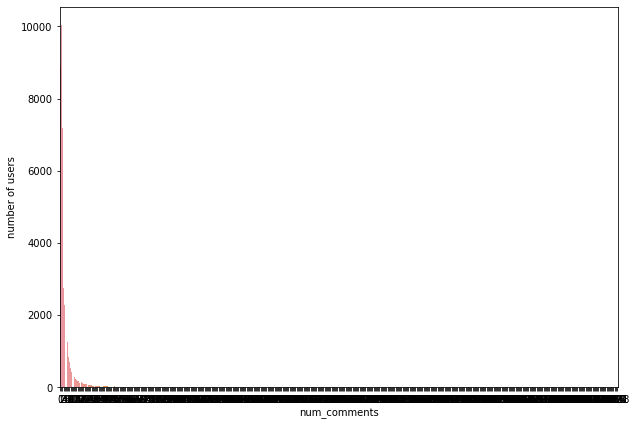

In [26]:
plt.figure(figsize=(10,7))
sns.barplot(x= 'num_comments', y= 'number of users', data =count_df)

In [27]:
reddit_data['selftext'].tail(5).to_list()

["I feel like such a prick during these crazy times because things are going well for me. I really genuinely feel regret for how well things are going for me. That being said, I still can't not feel ecstatic that I'm about to become a homeowner while just recently figuring out my wife is pregnant. I don't want her to know I'm typing this happy rant frantically (she's about to come in from the other room).\n\nI really just don't know who to celebrate this happy news with. I told one of my guy friends, and as much as I love him, he was a typical dude and didn't have a lot to say. I just feel like I need to yell to the heavens how happy I am.\n\nIf one person reads this and smiles 1% I'll feel like my need to share this news, that's defining a significant part of my life, is sane!\n\nAlso, on the off chance you're reading this and your life feels kinda shitty (for whatever reason)... I've been there. Life really does suck sometimes. I'm here to tell you it DEFINITELY (spelling?) gets bett

In [28]:
reddit_data.tail(5)

author over_18  \
41416   tree_thoughts   False   
41417       whoooooaa   False   
41418    Naval_Monkey   False   
41419    Naval_Monkey   False   
41420  misgvidedghost   False   

                                                   title  \
41416  I'm about to be a homeowner and my wife and I ...   
41417                             This cool dude I like!   
41418  Not only did I make my first million bells in ...   
41419  Not only did I make my first million bells in ...   
41420  It’s the little things, I’m blessed with amazi...   

                                                selftext  num_comments  score  \
41416  I feel like such a prick during these crazy ti...             5      1   
41417                                          [removed]             2      1   
41418                                                                2      1   
41419                                                                2      1   
41420                                                                2      1   

                                               full_link  created_utc  \
41416  https://www.reddit.com/r/happy/comments/goadmh...   1590112823   
41417  https://www.reddit.com/r/happy/comments/goaow5...   1590114056   
41418  https://www.reddit.com/r/happy/comments/gobj81...   1590117468   
41419  https://www.reddit.com/r/happy/comments/gobjcp...   1590117483   
41420  https://www.reddit.com/r/happy/comments/goc4y8...   1590119959   

                timestamp  
41416 2020-05-21 22:00:23  
41417 2020-05-21 22:20:56  
41418 2020-05-21 23:17:48  
41419 2020-05-21 23:18:03  
41420 2020-05-21 23:59:19

In [29]:
reddit_data[reddit_data['selftext'].str.contains("happy") == True].count()

author          2825
over_18         2825
title           2825
selftext        2825
num_comments    2825
score           2825
full_link       2825
created_utc     2825
timestamp       2825
dtype: int64

In [30]:
reddit_data[reddit_data['selftext'].str.contains("happy") == True]['selftext'].head(1).to_list()

['Ive been out of work for 4 months now and i had an interview at a hospital near me last Wednesday. Well i have some possession charges against me, and i got a call back anyway not even 5 minutes ago and i just feel so freaking relieved and happy it isnt even funny.']

In [31]:
reddit_data[reddit_data['selftext'].str.contains("happiness") == True].count()

author          442
over_18         442
title           442
selftext        442
num_comments    442
score           442
full_link       442
created_utc     442
timestamp       442
dtype: int64

In [32]:
reddit_data[reddit_data['selftext'].str.contains("happiness") == True]['selftext'].tail(1).to_list()

['This lockdown has been one of extreme introspection. I still feel there’s a long way to go, but I needed to undergo, almost 17 years of long overdue healing process.\n\nI’ve been carrying around immense guilt for wronging an ex. After him, I’ve dated multiple people, but this guilt has stayed with me.\n\nFor almost 5 years now. This, even after I apologised to him and he was kind enough to forgive me.\n\nAs time went on, we drifted apart, only to wake up one day and see that he had deleted my number. He was seeing someone new, and I never wanted to get into the happy couples’ way. \n\nBut I’ve punished myself repeatedly and always felt like apologizing to him— again and again. Only to realise today, seeking his forgiveness is actually me seeking validation— an acknowledgment from him that I’ve changed.\n\nAnd this thought shifted my entire perspective. I suddenly realised what forgiving yourself means. It feels like a weight is lifted off my chest. I feel like I deserve beautiful thi